In [1]:
import pandas as pd 
import numpy as np 

C:\Users\Monish\AppData\Local\Temp\ipykernel_15664\1228117823.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from sklearn.cluster import KMeans

In [3]:
from sentence_transformers import SentenceTransformer,util

c:\Users\Monish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [4]:
df=pd.read_csv("data.csv")

In [5]:
# Split the column by comma and strip whitespace
df[['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location', 'Confidence Score']] = df["Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"].str.split(',', expand=True)

# Remove leading and trailing whitespace from columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Create the new 'feedback' column with 'Sentiment' values
df['feedback'] = df['Text']

# Drop the split columns to keep only original and new 'feedback' columns
df = df.drop(columns=['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location', 'Confidence Score'])

# Display the resulting DataFrame


In [6]:
df["feedback"].isnull().sum()

2

In [7]:
df = df.dropna(subset=['feedback'])

In [8]:
feedback_list = df['feedback'].tolist()
corpus=feedback_list

In [9]:
embedder = SentenceTransformer('all-MiniLM-L6-v2')

In [10]:
corpus_embeddings=embedder.encode(corpus)

In [11]:
corpus_embeddings=corpus_embeddings/np.linalg.norm(corpus_embeddings,axis=1,keepdims=True)

In [12]:
model=KMeans(n_clusters=10)
model.fit(corpus_embeddings)
cluster_assignment = model.labels_ 
cluster_assignment

array([7, 5, 8, 5, 1, 9, 4, 2, 8, 5, 8, 9, 6, 1, 4, 2, 6, 0, 6, 5, 8, 5,
       9, 0, 5, 6, 1, 4, 2, 6, 0, 4, 5, 1, 7, 8, 5, 5, 3, 1, 4, 2, 6, 0,
       3, 5, 1, 8, 6, 5, 8, 9, 2, 5, 3, 5, 5, 1, 4, 2, 1, 9, 4, 2, 6, 0,
       8, 1, 4, 2, 6, 7, 8, 5, 5, 5, 1, 4, 2, 7, 5, 8, 5, 1, 9, 4, 2, 8,
       5, 8, 9, 6, 1, 4, 2, 6])

In [13]:
cluster_sentence={}
for sentence_id,cluster_id in enumerate(cluster_assignment):
    if cluster_id not in cluster_sentence:
        cluster_sentence[cluster_id] =[]
    cluster_sentence[cluster_id].append(corpus[sentence_id])
    
    
cluster_sentence

{7: ['"I love this product!"',
  '"The product I purchased broke within a week. Poor quality."',
  '"The product I received was of poor quality. It broke after a few uses."',
  '"I love this product!"'],
 5: ['"The service was terrible."',
  '"I\'m so disappointed with their customer support."',
  '"The customer service was terrible."',
  '"I had a terrible experience with their customer support."',
  '"The customer service at this store is top-notch."',
  '"Just had the worst flight experience. Delayed and rude staff."',
  '"I had a great chat with their customer support. Helpful and friendly."',
  '"The customer service at this store is exceptional. They went above and beyond."',
  '"I had a terrible experience with their technical support. No resolution."',
  '"The customer support was quick to respond and resolved my issue. Impressed!"',
  '"The customer service at this hotel was terrible. Avoid at all costs."',
  '"I had a terrible experience with their delivery service. Late and 

In [14]:


# # Load the model
# model = SentenceTransformer('all-MiniLM-L6-v2')

# # Define some sentences
# sentences = ["This is an example sentence", "Each sentence is converted"]

# # Generate embeddings
# embeddings = model.encode(sentences)

# # Print the embeddings
# for sentence, embedding in zip(sentences, embeddings):
#     print(f"Sentence: {sentence}")
#     print(f"Embedding: {embedding}\n")


****

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sentence_transformers import SentenceTransformer

In [16]:
df = pd.read_csv("data.csv")

# Split the column by comma and strip whitespace
df[['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location', 'Confidence Score']] = df["Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"].str.split(',', expand=True)

# Remove leading and trailing whitespace from columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Create the new 'feedback' column with 'Sentiment' values
df['feedback'] = df['Text']

# Drop the split columns to keep only original and new 'feedback' columns
df = df.drop(columns=['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location', 'Confidence Score'])

# Drop rows with NaN values in 'feedback' column
df = df.dropna(subset=['feedback'])

# Collect all rows of the feedback column into a single list
feedback_list = df['feedback'].tolist()

In [17]:
# Sentence embedding
embedder = SentenceTransformer('all-MiniLM-L6-v2')
corpus_embeddings = embedder.encode(feedback_list)
corpus_embeddings = corpus_embeddings / np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)


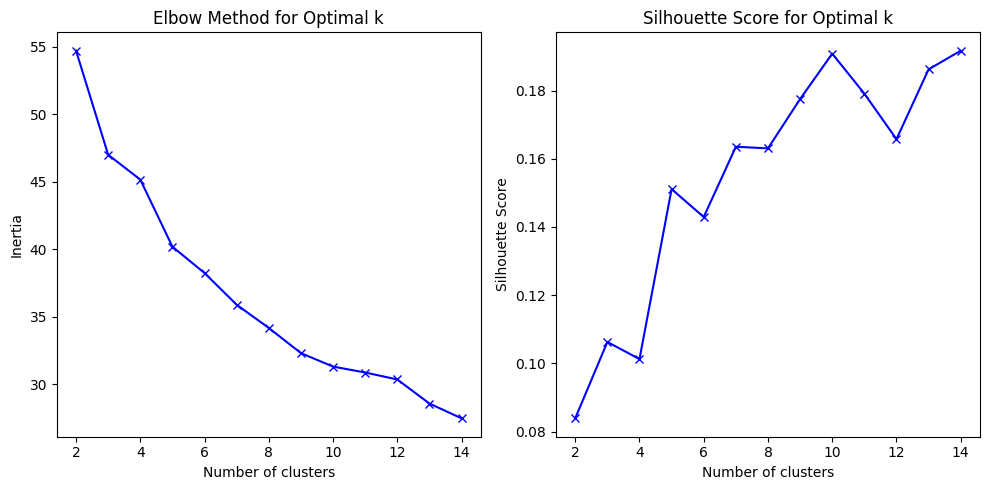

In [18]:
# Determine the optimal number of clusters using the Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 15)

for n_clusters in range_n_clusters:
    model = KMeans(n_clusters=n_clusters, random_state=42)
    model.fit(corpus_embeddings)
    cluster_labels = model.labels_
    inertia.append(model.inertia_)
    silhouette_avg = silhouette_score(corpus_embeddings, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plot the Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.tight_layout()
plt.show()

In [19]:
# Choose the optimal number of clusters based on the Elbow Method and Silhouette Score
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]

In [20]:
# Fit the KMeans model with the optimal number of clusters
model = KMeans(n_clusters=optimal_n_clusters, random_state=42)
model.fit(corpus_embeddings)
cluster_assignment = model.labels_

In [21]:
# Organize sentences by their cluster assignment
cluster_sentence = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in cluster_sentence:
        cluster_sentence[cluster_id] = []
    cluster_sentence[cluster_id].append(feedback_list[sentence_id])

# Display the clustered sentences
cluster_sentence

{8: ['"I love this product!"',
  '"The product arrived damaged. Very disappointed."',
  '"The product I received was damaged. Unacceptable."',
  '"The product I ordered never arrived. Terrible service."',
  '"The product I purchased broke within a week. Poor quality."',
  '"The product I ordered arrived damaged. Very disappointed with the packaging."',
  '"The product I ordered never arrived. Poor customer service."',
  '"The product I received was of poor quality. It broke after a few uses."',
  '"I love this product!"'],
 7: ['"The service was terrible."',
  '"The customer service was terrible."',
  '"Just had the worst flight experience. Delayed and rude staff."',
  '"The customer service at this hotel was terrible. Avoid at all costs."',
  '"The hotel staff were rude and unprofessional. Terrible customer service."',
  '"The hotel staff were rude and unprofessional. Terrible customer service."',
  '"The service was terrible."',
  '"The customer service was terrible."'],
 11: ['"This